In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import GTM.GTMcore as GTM
import GTM.Permittivities as mat
from scipy.constants import c, pi

In [2]:
n3 = 3.4
epsGlass = lambda x : n3**2

Air = GTM.Layer()
Ag = GTM.Layer(epsilon1 = mat.eps_Ag)
M1 = GTM.Layer(epsilon1=mat.eps_MoO3x, epsilon2=mat.eps_MoO3y, epsilon3=mat.eps_MoO3z)
M2 = GTM.Layer(epsilon1=mat.eps_MoO3x, epsilon2=mat.eps_MoO3y, epsilon3=mat.eps_MoO3z)
Glass = GTM.Layer(epsilon1 = epsGlass)

S = GTM.System()
S.set_superstrate(Air)
S.set_substrate(Air)
S.add_layer(M1)
S.add_layer(M2)
S.add_layer(Glass)
S.add_layer(Ag)

In [3]:
d1 = 15e-9
d2 = 15e-9
d3 = 0.8e-6
M1.set_thickness(d1)
M2.set_thickness(d2)
Glass.set_thickness(d3)
zeta_sys = 0
alpha = 0
M1.set_euler(theta=0, phi=0, psi=0)
M2.set_euler(theta=0, phi=0, psi=alpha*pi/180)

C:\Users\adeeva\Anaconda3\GTM\GTMcore.py:494: RuntimeWarning: invalid value encountered in double_scalars
  Cp_t1 = np.abs(self.Py[0,transmode[0]])**2/(np.abs(self.Py[0,transmode[0]])**2+np.abs(self.Py[1,transmode[0]])**2)
C:\Users\adeeva\Anaconda3\GTM\GTMcore.py:495: RuntimeWarning: invalid value encountered in double_scalars
  Cp_t2 = np.abs(self.Py[0,transmode[1]])**2/(np.abs(self.Py[0,transmode[1]])**2+np.abs(self.Py[1,transmode[1]])**2)


(18.62969321818182, 12.292229789811012, 0.6317134560813296)

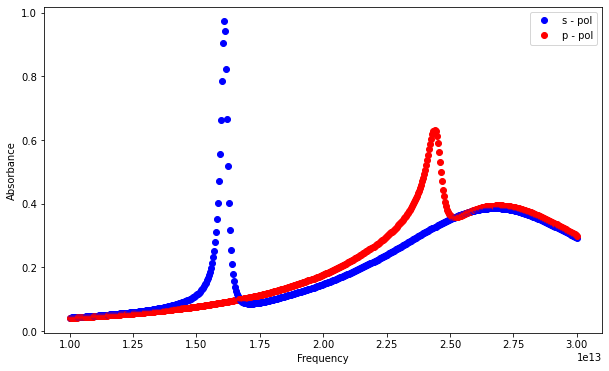

In [4]:
F = np.linspace(10*10**12, 30*10**12, 500)
plt.figure(figsize=(10, 6))
zeta_sys = np.sin(0*pi/180)

a0 = 0
a1 = 0
f0 = 24.6e12
f1 = 16.3e12

for ii, fr in enumerate(F):
    S.initialize_sys(fr)      
    Sys_Gamma = S.calculate_GammaStar(fr, zeta_sys)
    r, R, t, T = S.calculate_r_t(zeta_sys)
    A1 = 1-R[1]-R[2]
    A0 = 1-R[0]-R[3]
    plt.plot(fr, A1, 'ob')
    plt.plot(fr, A0, 'or')
    
    if (14 < fr/1e12 < 17): 
        if a0 < max(A0, A1):
            a0 = max(A0, A1)
            f0 = fr

    elif (24 < fr/1e12 < 26): 
        if a1 < max(A0, A1):
            a1 = max(A0, A1)
            f1 = fr
    
plt.xlabel("Frequency")
plt.ylabel("Absorbance")
plt.legend(["s - pol", "p - pol"])

c/f0/1e-6, c/f1/1e-6, a1

(0.09019431731703498,
 0.972440822249283,
 0.3263076971608383,
 0.6317134560813296)

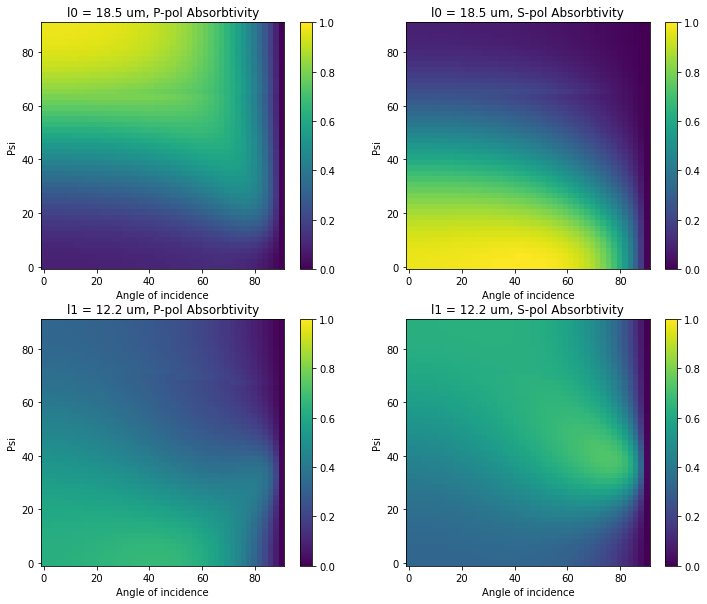

In [5]:
PSI = np.linspace(0.0, 90.1, 45)
A = np.linspace(0.0, 90.1, 45) ## angle of incidence
Aplot = np.zeros((len(PSI),len(A), 2, 2))
F01 = [f0, f1]

for kk, f01 in enumerate(F01):
    S.initialize_sys(f01)
    for jj, psi in enumerate(PSI):
        M1.set_euler(theta=0, phi=0, psi=np.deg2rad(psi))
        M2.set_euler(theta=0, phi=0, psi=np.deg2rad(psi+alpha))
        for ii, a in enumerate(A):
            zeta_sys = np.sin(np.deg2rad(a))
            Sys_Gamma = S.calculate_GammaStar(f01, zeta_sys) 
            r, R, t, T = S.calculate_r_t(zeta_sys) 
            Aplot[jj, ii, 0, kk] = 1-R[0]-R[3]
            Aplot[jj, ii, 1, kk] = 1-R[1]-R[2]

Plots = plt.figure(figsize=(12,10))

P0plot = Plots.add_subplot(221)
P0 = P0plot.pcolormesh(A, PSI, Aplot[:,:, 0, 0], shading='auto', vmin =0, vmax = 1)
Plots.colorbar(P0)
P0plot.set_ylabel('Psi')
P0plot.set_xlabel('Angle of incidence')
P0plot.set_title('l0 = 18.5 um, P-pol Absorbtivity')

S0plot = Plots.add_subplot(222)
S0 = S0plot.pcolormesh(A, PSI, Aplot[:,:, 1, 0], shading='auto', vmin =0, vmax = 1)
Plots.colorbar(S0)
S0plot.set_xlabel('Angle of incidence')
S0plot.set_ylabel('Psi')
S0plot.set_title('l0 = 18.5 um, S-pol Absorbtivity')

P1plot = Plots.add_subplot(223)
P1 = P1plot.pcolormesh(A, PSI, Aplot[:,:, 0, 1], shading='auto', vmin =0, vmax = 1)
Plots.colorbar(P1)
P1plot.set_ylabel('Psi')
P1plot.set_xlabel('Angle of incidence')
P1plot.set_title('l1 = 12.2 um, P-pol Absorbtivity')

S1plot = Plots.add_subplot(224)
S1 = S1plot.pcolormesh(A, PSI, Aplot[:,:, 1, 1], shading='auto', vmin =0, vmax = 1)
Plots.colorbar(S1)
S1plot.set_xlabel('Angle of incidence')
S1plot.set_ylabel('Psi')
S1plot.set_title('l1 = 12.2 um, S-pol Absorbtivity')

Aplot[0,0,0,0], Aplot[0,0,1,0], Aplot[0,0,1,1], Aplot[0,0,0,1]

47.98118118118118


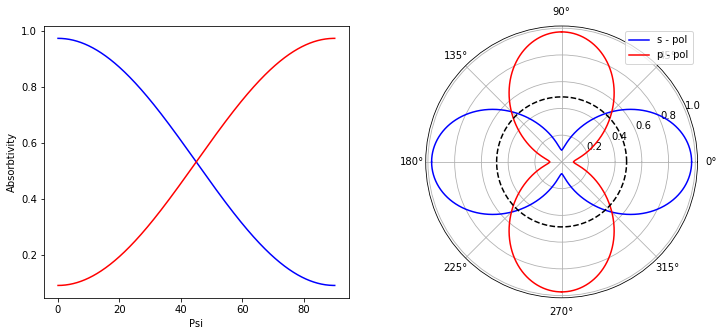

In [6]:
PSI = np.linspace(0.0, 90.1, 1000)
PSi = np.linspace(0.0, 360.0, 1000)
fr1 = f0
aa = 0
S.initialize_sys(fr1)
zeta_sys = np.sin(aa*pi/180)

Plots = plt.figure(figsize=(12,5))
Cartesian = Plots.add_subplot(121)
Polar = Plots.add_subplot(122, projection = 'polar')
Bplot = np.zeros((len(PSI), 2))

an = 0

for jj, psi in enumerate(PSI):
    
    M1.set_euler(theta=0, phi=0, psi=np.deg2rad(psi))
    M2.set_euler(theta=0, phi=0, psi=np.deg2rad(psi+alpha))
    Sys_Gamma = S.calculate_GammaStar(fr1, zeta_sys) 
    r, R, t, T = S.calculate_r_t(zeta_sys) 
    
    Bplot[jj, 0] = 1-R[0]-R[3]-T[0]  #p
    Bplot[jj, 1] = 1-R[1]-R[2]-T[1]  #s
    
    if (an == 0)&(Bplot[jj, 1] < Bplot[0, 1]/2):
        an = jj
        print(PSI[an])
    
Cartesian.plot(PSI, Bplot[:, 1], 'b') #s
Cartesian.plot(PSI, Bplot[:, 0], 'r') #p
Polar.plot(PSI*pi/180, Bplot[:, 1], 'b') #s
Polar.plot(PSI*pi/180, Bplot[:, 0], 'r') #p
Polar.plot(2*pi-PSI*pi/180, Bplot[:, 1], 'b') #s
Polar.plot(2*pi-PSI*pi/180, Bplot[:, 0], 'r') #p
Polar.plot(pi+PSI*pi/180, Bplot[:, 1], 'b') #s
Polar.plot(pi+PSI*pi/180, Bplot[:, 0], 'r') #p
Polar.plot(pi-PSI*pi/180, Bplot[:, 1], 'b') #s
Polar.plot(pi-PSI*pi/180, Bplot[:, 0], 'r') #p

Bl = lambda x : Bplot[0, 1]/2
Polar.plot(PSi*pi/180, np.vectorize(Bl)(PSi), 'black', ls = '--') 



Cartesian.set_xlabel("Psi")
Cartesian.set_ylabel("Absorbtivity")
plt.legend(["s - pol", "p - pol"])


#print (alpha, d1, d2, d3, fr1/1e12, aa)

Text(0.5, 1.0, 'S-pol Absorbtion')

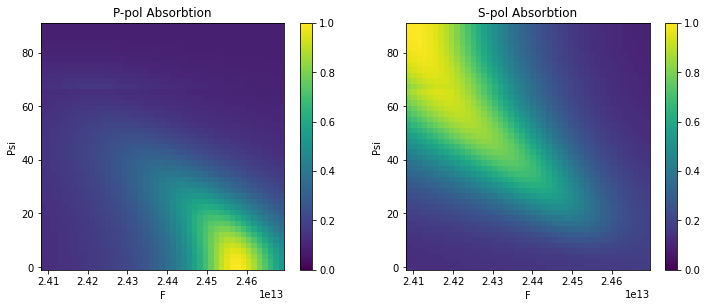

In [7]:
PSI = np.linspace(0.0, 90.1, 45)
F = np.linspace(f1-3e11, f1+3e11, 45)
#A = np.linspace(0.0, 90.1, 45) ## angle of incidence
Aplot = np.zeros((len(PSI),len(A), 2))
aa = 80
zeta_sys = np.sin(np.deg2rad(aa))

for jj, psi in enumerate(PSI):
    M1.set_euler(theta=0, phi=0, psi=np.deg2rad(psi))
    M2.set_euler(theta=0, phi=0, psi=np.deg2rad(psi+alpha))
    for ii, fr in enumerate(F):
        S.initialize_sys(fr)
        Sys_Gamma = S.calculate_GammaStar(fr, zeta_sys) 
        r, R, t, T = S.calculate_r_t(zeta_sys) 
        Aplot[jj, ii, 0] = 1-R[0]-R[3]
        Aplot[jj, ii, 1] = 1-R[1]-R[2]

Plots = plt.figure(figsize=(12,10))

P0plot = Plots.add_subplot(221)
P0 = P0plot.pcolormesh(F, PSI, Aplot[:,:, 0], shading='auto', vmin =0, vmax = 1)
Plots.colorbar(P0)
P0plot.set_ylabel('Psi')
P0plot.set_xlabel('F')
P0plot.set_title('P-pol Absorbtion')

S0plot = Plots.add_subplot(222)
S0 = S0plot.pcolormesh(F, PSI, Aplot[:,:, 1], shading='auto', vmin =0, vmax = 1)
Plots.colorbar(S0)
S0plot.set_xlabel('F')
S0plot.set_ylabel('Psi')
S0plot.set_title('S-pol Absorbtion')



12.203527003890821


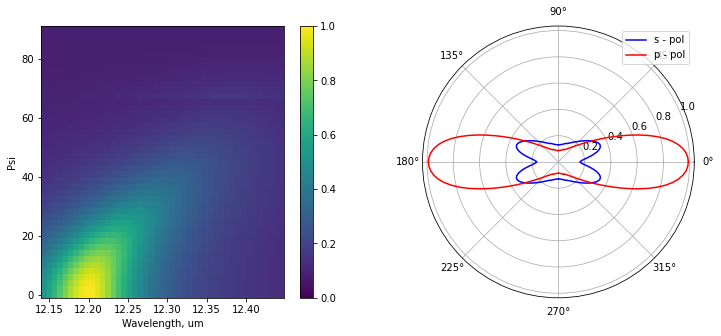

In [8]:
Plots = plt.figure(figsize=(12,5))
Polar = Plots.add_subplot(122, projection = 'polar')
Color = Plots.add_subplot(121)
P0 = Color.pcolormesh(c/F/1e-6, PSI, Aplot[:,:, 0], shading='auto', vmin =0, vmax = 1)
Plots.colorbar(P0)
Color.set_ylabel('Psi')
Color.set_xlabel('Wavelength, um')
#Color.set_title('P-pol Absorbtion')

k = 35
#Cartesian.plot(PSI, Aplot[:, k, 1], 'ob') #s
#Cartesian.plot(PSI, Aplot[:, k, 0], 'or') #p
Polar.plot(PSI*pi/180, Aplot[:, k, 1], 'b') #s
Polar.plot(PSI*pi/180, Aplot[:, k, 0], 'r') #p
Polar.plot(2*pi-PSI*pi/180, Aplot[:, k, 1], 'b') #s
Polar.plot(2*pi-PSI*pi/180, Aplot[:, k, 0], 'r') #p
Polar.plot(pi+PSI*pi/180, Aplot[:, k, 1], 'b') #s
Polar.plot(pi+PSI*pi/180, Aplot[:, k, 0], 'r') #p
Polar.plot(pi-PSI*pi/180, Aplot[:, k, 1], 'b') #s
Polar.plot(pi-PSI*pi/180, Aplot[:, k, 0], 'r') #p

#Cartesian.set_xlabel("Psi")
#Cartesian.set_ylabel("Absorbtivity")
Polar.legend(["s - pol", "p - pol"])

print(c/F[k]/1e-6)

C:\Users\adeeva\Anaconda3\GTM\GTMcore.py:494: RuntimeWarning: invalid value encountered in double_scalars
  Cp_t1 = np.abs(self.Py[0,transmode[0]])**2/(np.abs(self.Py[0,transmode[0]])**2+np.abs(self.Py[1,transmode[0]])**2)
C:\Users\adeeva\Anaconda3\GTM\GTMcore.py:495: RuntimeWarning: invalid value encountered in double_scalars
  Cp_t2 = np.abs(self.Py[0,transmode[1]])**2/(np.abs(self.Py[0,transmode[1]])**2+np.abs(self.Py[1,transmode[1]])**2)


(0.09019431731703498,
 0.972440822249283,
 0.3263076971608383,
 0.6317134560813296)

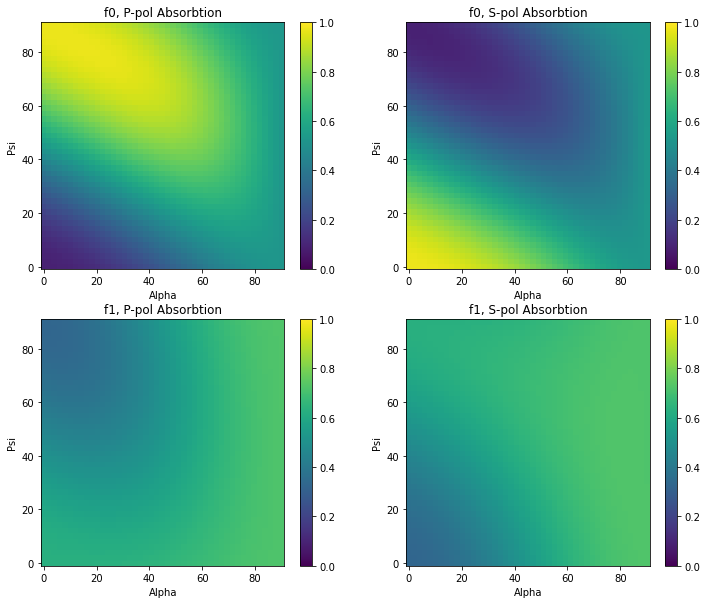

In [9]:
Aplot = np.zeros((len(PSI),len(PSI), 2, 2))
F01 = [f0, f1]
zeta_sys = np.sin(np.deg2rad(0))

for kk, f01 in enumerate(F01):
    S.initialize_sys(f01)
    for jj, psi in enumerate(PSI):
        for ii, al in enumerate(PSI):
            M1.set_euler(theta=0, phi=0, psi=np.deg2rad(psi))
            M2.set_euler(theta=0, phi=0, psi=np.deg2rad(psi+al))
            Sys_Gamma = S.calculate_GammaStar(f01, zeta_sys) 
            r, R, t, T = S.calculate_r_t(zeta_sys) 
            Aplot[jj, ii, 0, kk] = 1-R[0]-R[3]
            Aplot[jj, ii, 1, kk] = 1-R[1]-R[2]

Plots = plt.figure(figsize=(12,10))

P0plot = Plots.add_subplot(221)
P0 = P0plot.pcolormesh(PSI, PSI, Aplot[:,:, 0, 0], shading='auto', vmin =0, vmax = 1)
Plots.colorbar(P0)
P0plot.set_ylabel('Psi')
P0plot.set_xlabel('Alpha')
P0plot.set_title('f0, P-pol Absorbtion')

S0plot = Plots.add_subplot(222)
S0 = S0plot.pcolormesh(PSI, PSI, Aplot[:,:, 1, 0], shading='auto', vmin =0, vmax = 1)
Plots.colorbar(S0)
S0plot.set_xlabel('Alpha')
S0plot.set_ylabel('Psi')
S0plot.set_title('f0, S-pol Absorbtion')

P1plot = Plots.add_subplot(223)
P1 = P1plot.pcolormesh(PSI, PSI, Aplot[:,:, 0, 1], shading='auto', vmin =0, vmax = 1)
Plots.colorbar(P1)
P1plot.set_ylabel('Psi')
P1plot.set_xlabel('Alpha')
P1plot.set_title('f1, P-pol Absorbtion')

S1plot = Plots.add_subplot(224)
S1 = S1plot.pcolormesh(PSI, PSI, Aplot[:,:, 1, 1], shading='auto', vmin =0, vmax = 1)
Plots.colorbar(S1)
S1plot.set_xlabel('Alpha')
S1plot.set_ylabel('Psi')
S1plot.set_title('f1, S-pol Absorbtion')

Aplot[0,0,0,0], Aplot[0,0,1,0], Aplot[0,0,1,1], Aplot[0,0,0,1]

(16.092184368737474, 24.38877755511022, 0.6317134560813296)

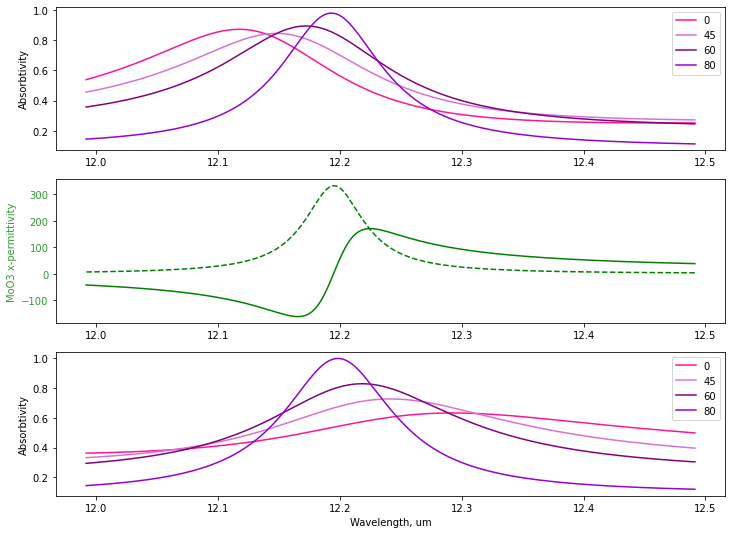

In [10]:
epsilon1=mat.eps_MoO3x
epsilon2=mat.eps_MoO3y
epsilon3=mat.eps_MoO3z

M1.set_euler(theta=0, phi=0, psi=np.deg2rad(0))
M2.set_euler(theta=0, phi=0, psi=np.deg2rad(0+alpha))

F = np.linspace(24*10**12, 25*10**12, 500)
ZETA =  [0, 45, 60, 80]
XX = np.zeros((len(ZETA),len(F)))

M1.set_thickness(d1)
Glass.set_thickness(d3)

for jj, zeta in enumerate(ZETA):
    zeta_sys = np.sin(np.deg2rad(zeta))
    for ii, fr in enumerate(F):
        S.initialize_sys(fr)   
        Sys_Gamma = S.calculate_GammaStar(fr, zeta_sys)
        r, R, t, T = S.calculate_r_t(zeta_sys)
        XX[jj, ii] = 1-R[0]-R[3]
        
M1.set_thickness(10e-9)
Glass.set_thickness(1e-6)
XY = np.zeros((len(ZETA),len(F)))

for jj, zeta in enumerate(ZETA):
    zeta_sys = np.sin(np.deg2rad(zeta))
    for ii, fr in enumerate(F):
        S.initialize_sys(fr)   
        Sys_Gamma = S.calculate_GammaStar(fr, zeta_sys)
        r, R, t, T = S.calculate_r_t(zeta_sys)
        XY[jj, ii] = 1-R[0]-R[3]
        
Plots = plt.figure(figsize=(12,9))

ax1 = Plots.add_subplot(313)

ax1.set_xlabel("Wavelength, um")
ax1.set_ylabel("Absorbtivity")
ax1.plot(c/F/1e-6, XX[0, :], 'deeppink')
ax1.plot(c/F/1e-6, XX[1, :], 'orchid')
ax1.plot(c/F/1e-6, XX[2, :], 'purple')
ax1.plot(c/F/1e-6, XX[3, :], 'darkviolet')
        
ax1.legend(["0", "45", "60", "80"])
   
ax2 = Plots.add_subplot(312)
   
color = 'tab:green'
ax2.set_ylabel('MoO3 x-permittivity', color = color)
ax2.plot(c/F/1e-6, np.vectorize(epsilon1)(F).real, 'g')
ax2.plot(c/F/1e-6, np.vectorize(epsilon1)(F).imag, '--g')
#ax2.plot(F, np.vectorize(epsilon2)(F).real, 'g')
#ax2.plot(F, np.vectorize(epsilon2)(F).imag, 'g', ls = '--')
#ax2.plot(F, np.vectorize(epsilon3)(F).real, 'olive')
#ax2.plot(F, np.vectorize(epsilon3)(F).imag, 'olive', ls = '--')
ax2.tick_params(axis ='y', labelcolor = color)

ax3 = Plots.add_subplot(311)

#ax3.set_xlabel("Frequency")
ax3.set_ylabel("Absorbtivity")
ax3.plot(c/F/1e-6, XY[0, :], 'deeppink')
ax3.plot(c/F/1e-6, XY[1, :], 'orchid')
ax3.plot(c/F/1e-6, XY[2, :], 'purple')
ax3.plot(c/F/1e-6, XY[3, :], 'darkviolet')
        
ax3.legend(["0", "45", "60", "80"])
  
M1.set_thickness(d1)
Glass.set_thickness(d3)

f0/1e12, f1/1e12, a1